In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import regridding._conservative_ramshaw

In [3]:
x, dx = np.linspace(-5, 5, 5, retstep=True)
y, dy = np.linspace(-5, 5, 5, retstep=True)

In [4]:
x, y = np.meshgrid(x, y, indexing="ij")

In [5]:
# a = 0 * x
# a[40:60] = 10
# a[:, 50:55] = 5
a = np.cos(x * x) + np.cos(y * y)
# a = x * y
a = a - a.min()
a = (a[1:, 1:] + a[1:, :~0] + a[:~0, 1:] + a[:~0, :~0]) / 4

In [6]:
a.min()

0.00824660636102581

In [7]:
angle = 45 * u.deg
x_rot = x * np.cos(angle) - y * np.sin(angle)
y_rot = x * np.sin(angle) + y * np.cos(angle)
x_rot, y_rot = 2 * x_rot.value, 2 * y_rot.value
# x_rot = x
# y_rot = y

In [8]:
dx * dy * 2 * 2

25.0

<IPython.core.display.Javascript object>


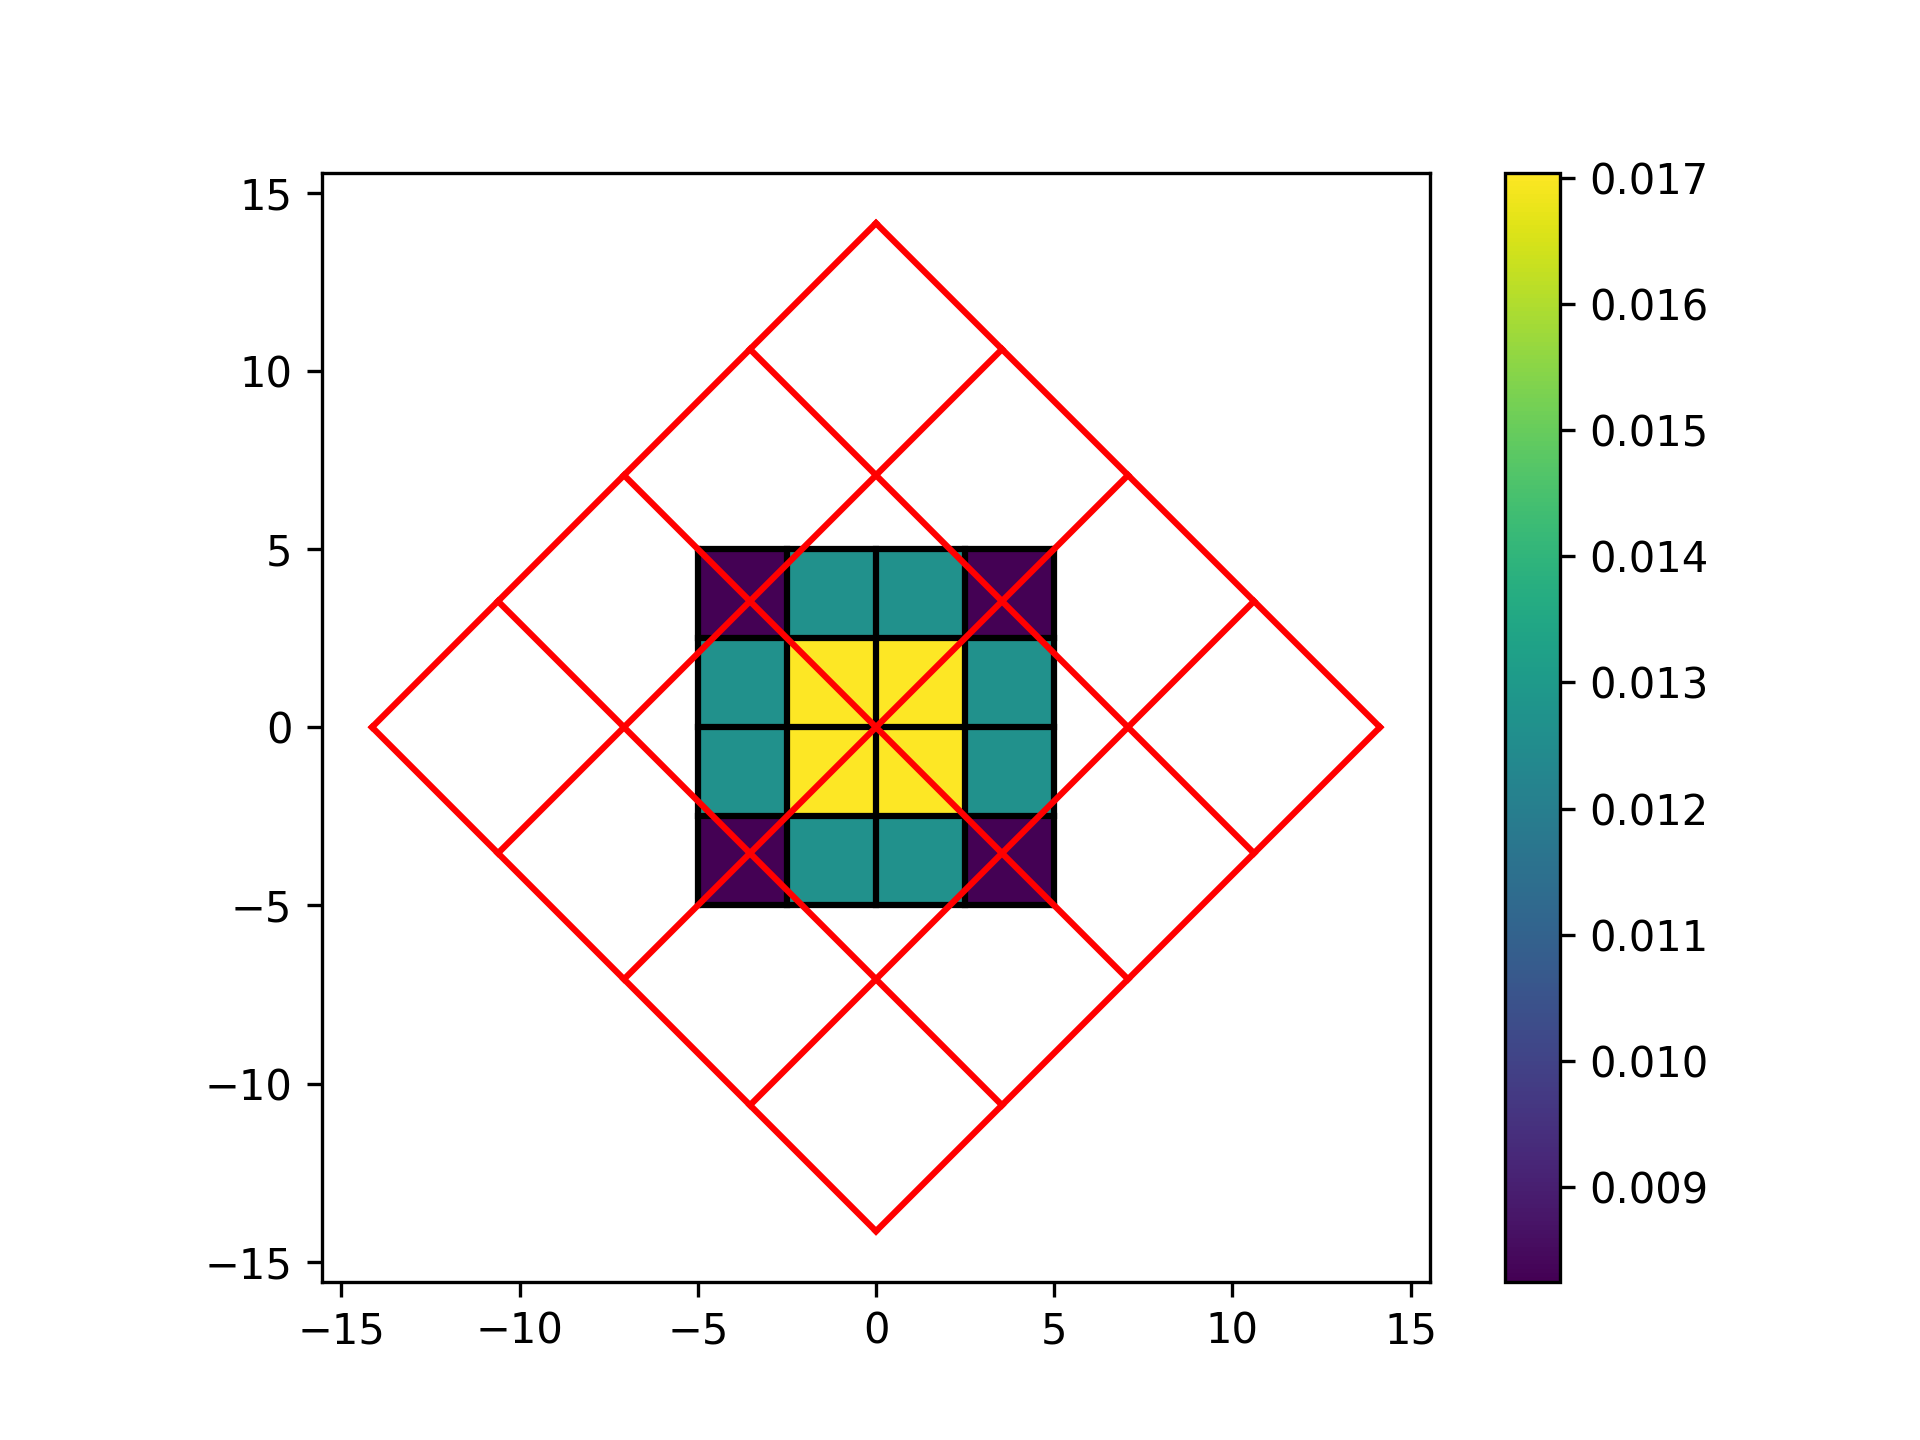

In [9]:
plt.figure()
plt.pcolormesh(x, y, a)
plt.plot(x, y, color="black")
plt.plot(x.T, y.T, color="black")
plt.plot(x_rot, y_rot, color="red")
plt.plot(x_rot.T, y_rot.T, color="red")
plt.gca().set_aspect("equal")
plt.colorbar()

In [10]:
%%time
a_rot = regridding._conservative_ramshaw._conservative_ramshaw(
    values_input=a,
    grid_input=(x, y),
    grid_output=(x_rot, y_rot),
)


C:\Users\royts\Kankelborg-Group\regridding\regridding\_conservative_ramshaw.py:26: NumbaExperimentalFeatureWarning: Use of isinstance() detected. This is an experimental feature.
  shape_output = np.broadcast_shapes(output_x.shape, output_y.shape)


CPU times: total: 1min 38s
Wall time: 1min 39s


In [11]:
a_rot.shape

(4, 4)

<IPython.core.display.Javascript object>


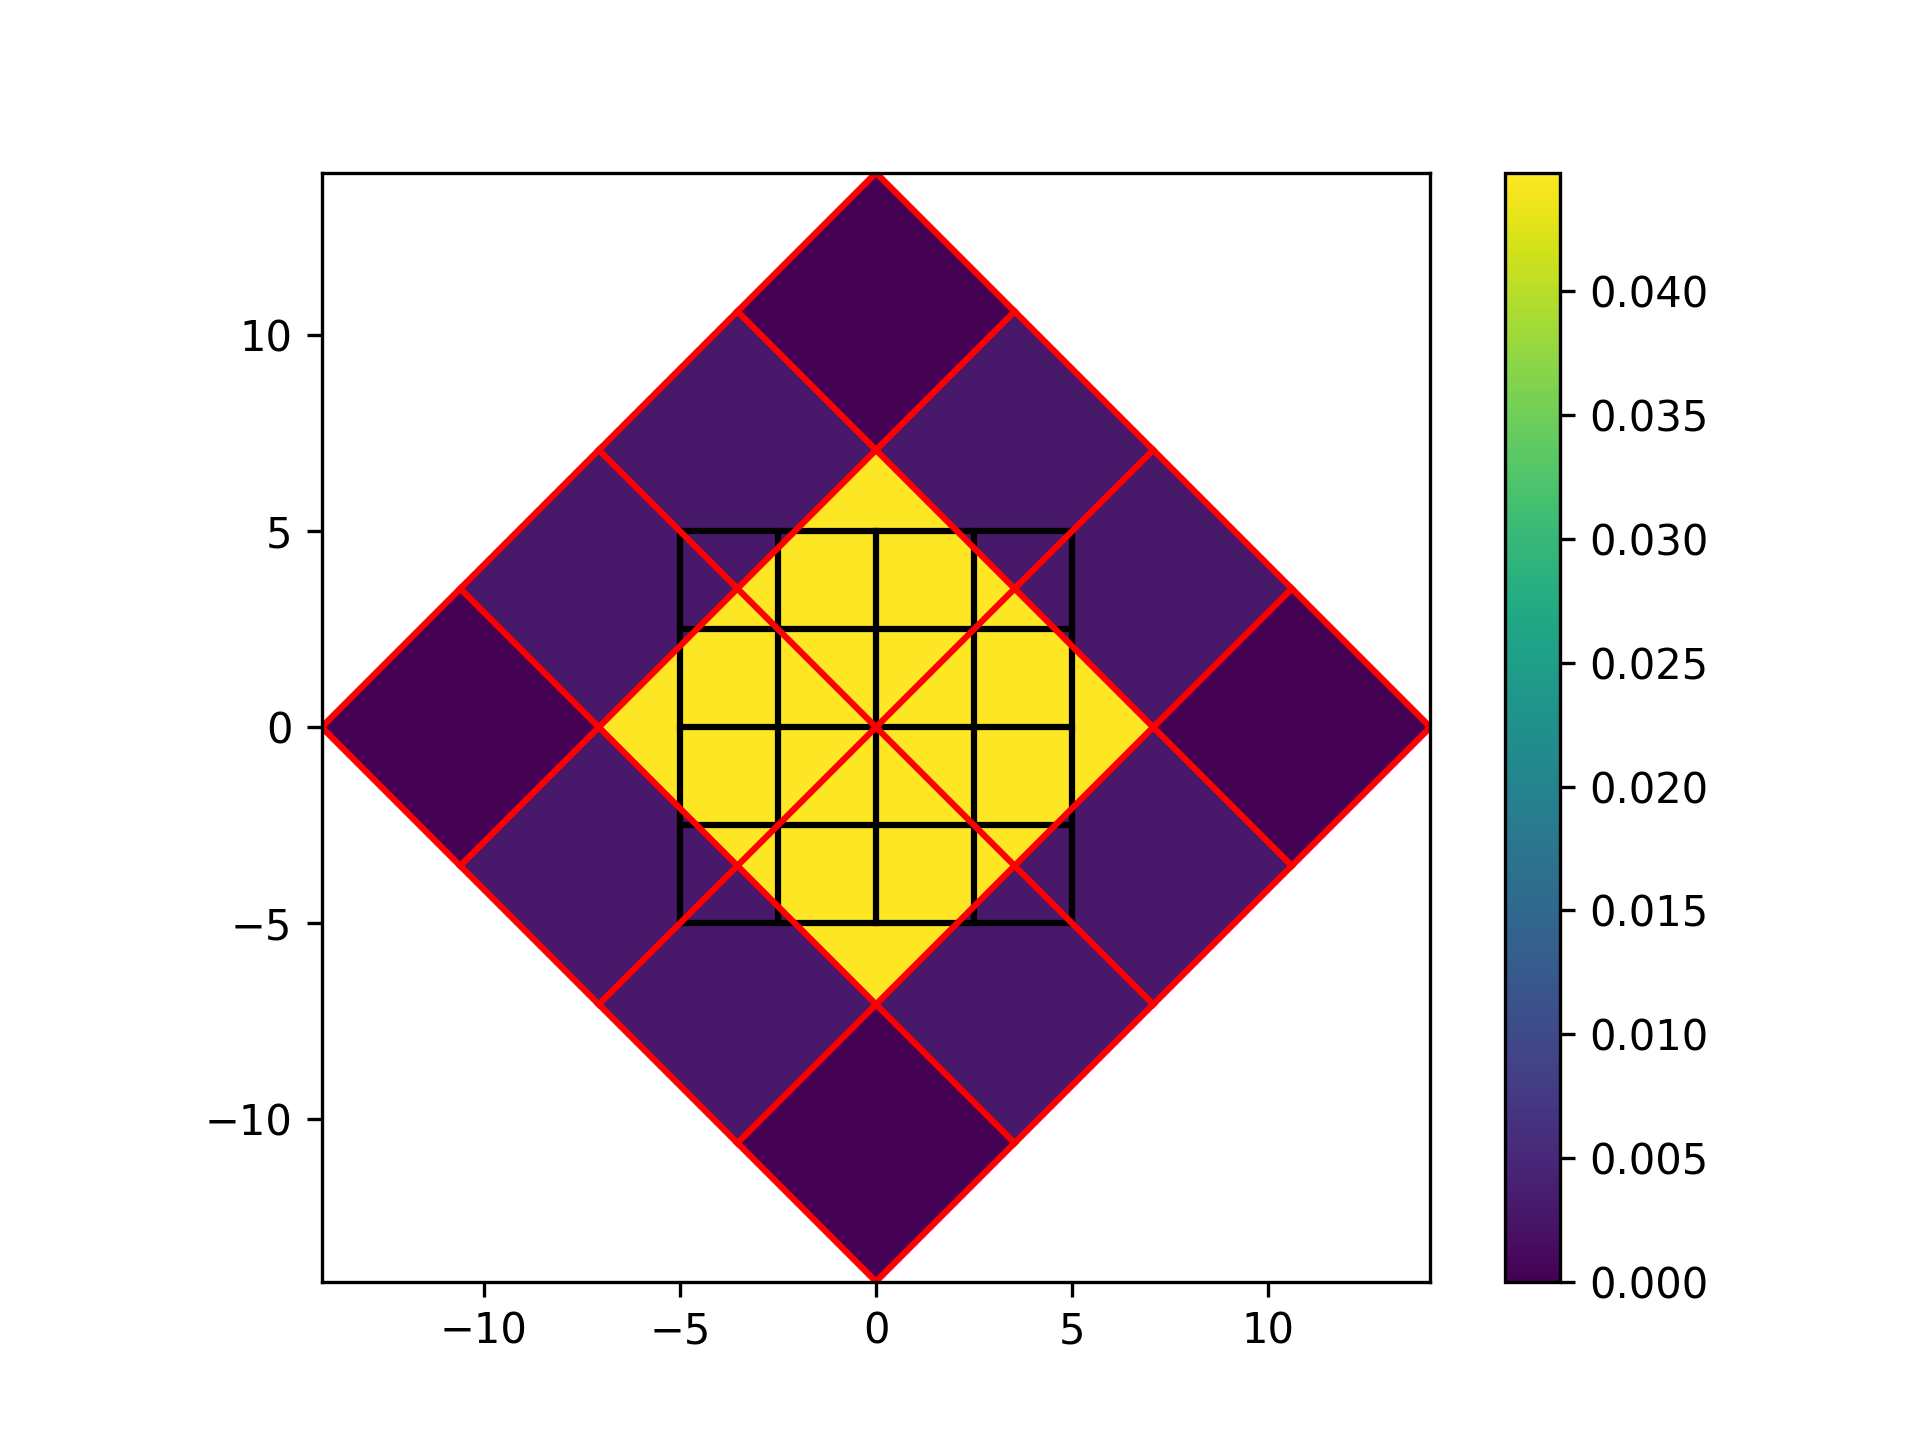

In [12]:
plt.figure()
plt.pcolormesh(x_rot, y_rot, a_rot)
plt.plot(x, y, color="black")
plt.plot(x.T, y.T, color="black")
plt.plot(x_rot, y_rot, color="red")
plt.plot(x_rot.T, y_rot.T, color="red")
plt.gca().set_aspect("equal")
plt.colorbar()

<IPython.core.display.Javascript object>


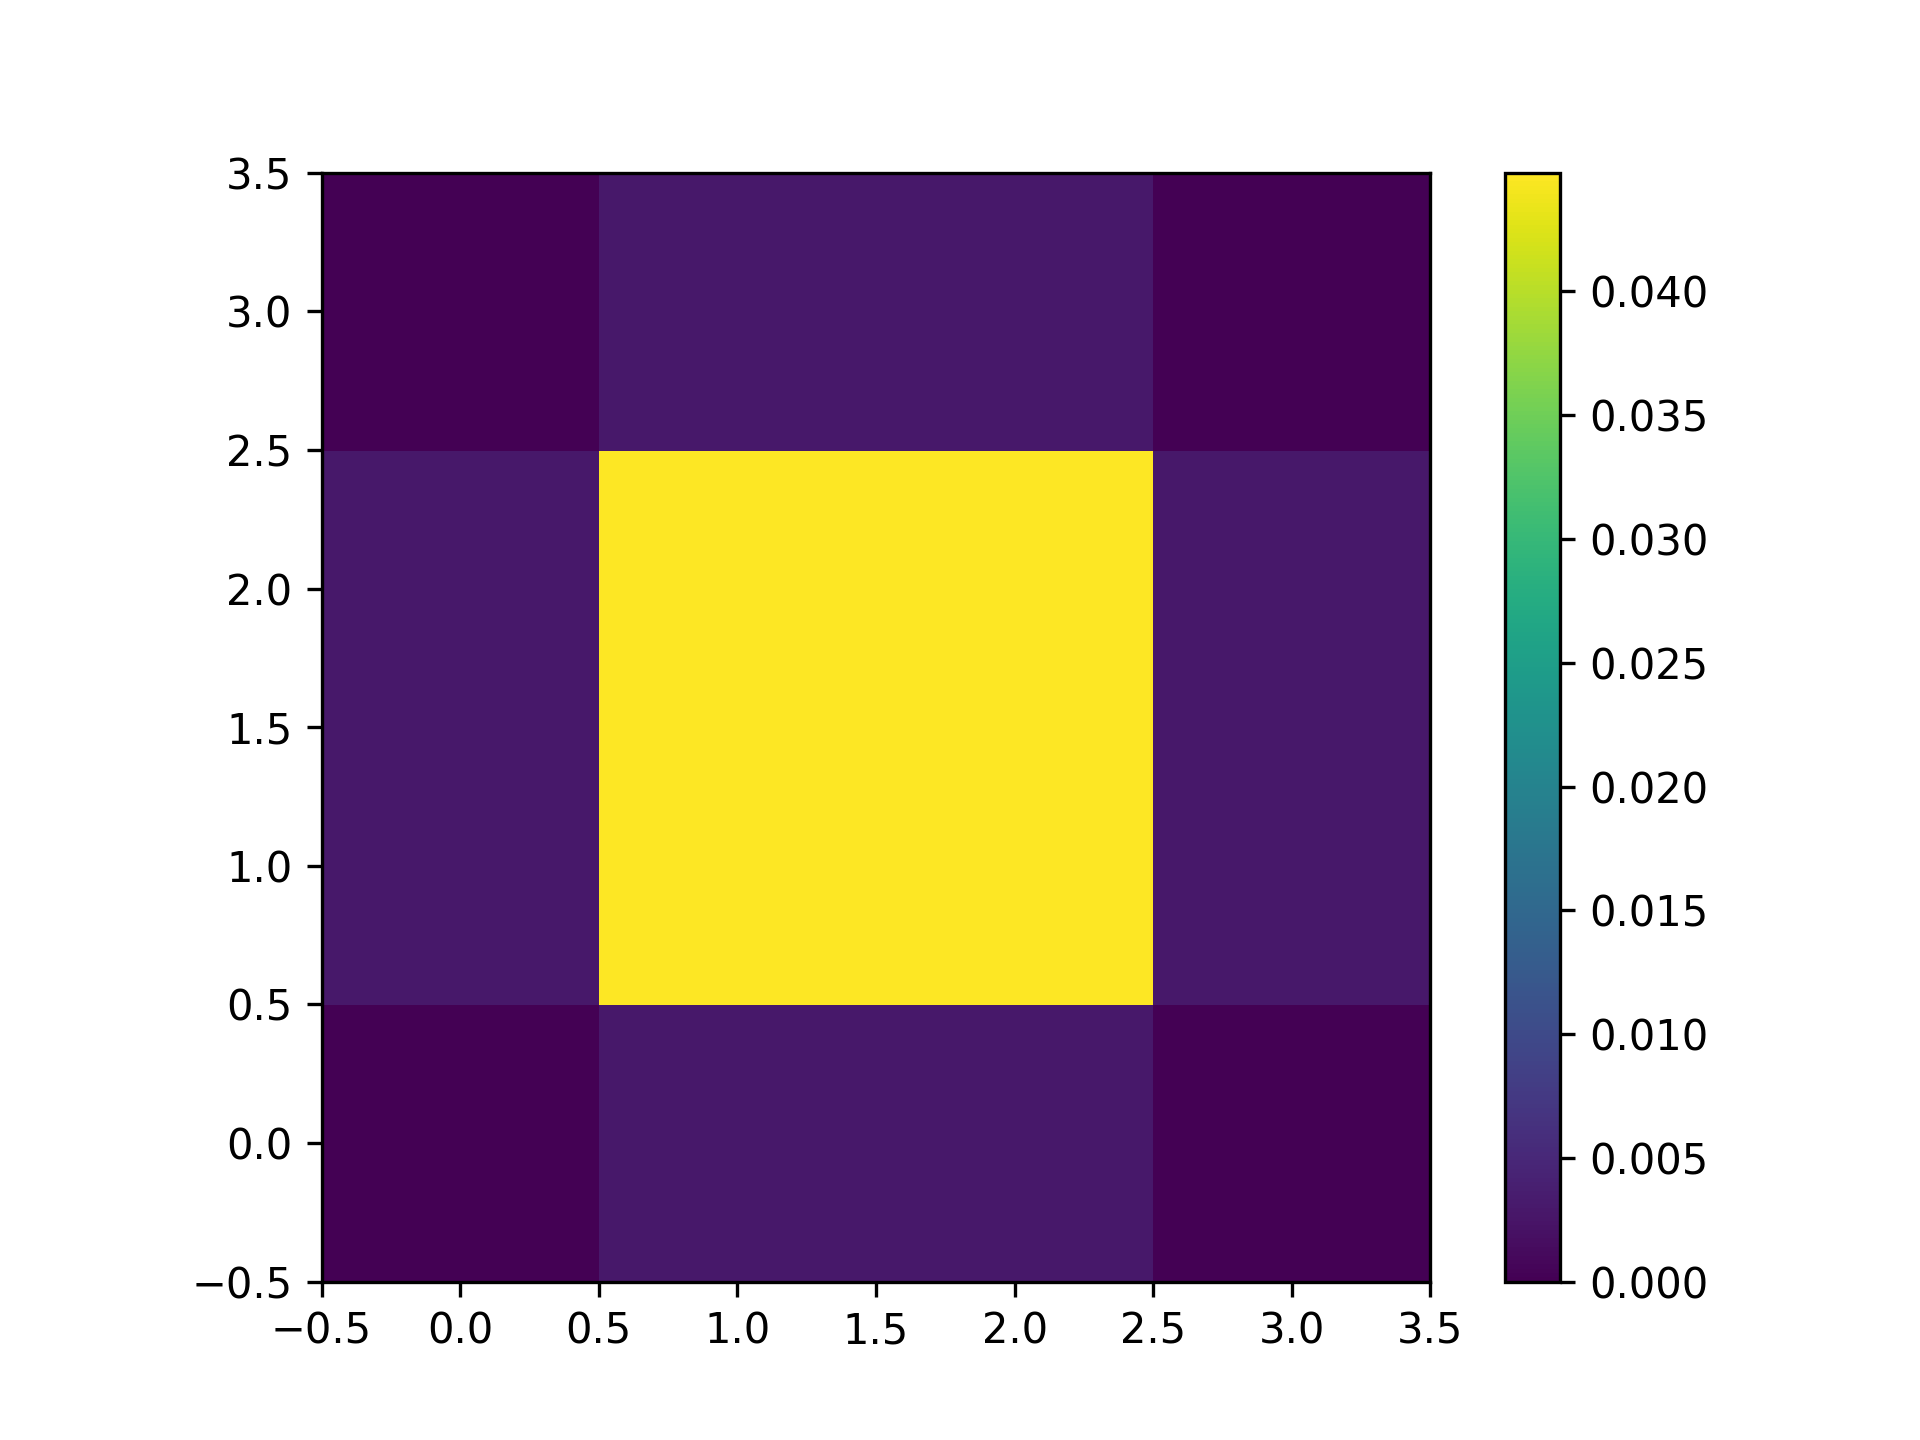

In [13]:
plt.figure()
plt.imshow(a_rot.T, origin="lower")
plt.colorbar()

In [14]:
a.sum()

0.20232320686862404

In [15]:
a_rot.sum()

0.20232320686862404

In [16]:
regridding._conservative_ramshaw._two_line_segment_intersection_parameters(
    x1=0, y1=0,
    x2=1, y2=0,
    x3=2, y3=0,
    x4=3, y4=0,
)

(nan, nan)

In [17]:
np.array(1) / 0

C:\Users\royts\AppData\Local\Temp\ipykernel_3076\3382844163.py:1: RuntimeWarning: divide by zero encountered in divide
  np.array(1) / 0


inf

In [18]:
np.inf == np.inf

True

In [19]:
np.nan == np.nan

False

In [20]:
regridding._conservative_ramshaw._point_is_inside_polygon(
    vertices_x=np.array([0, 1, 1, 0]),
    vertices_y=np.array([0, 0, 1, 1]),
    point_x=0.5,
    point_y=1,
)

True